# K-vecinos más próximos

## Definición y resultados asintóticos

Dada una entrada $\boldsymbol{x}$, el clasificador (por los) **$K$ vecinos más próximos** o **K nearest neighbor (KNN)** busca $K$ ejemplos o prototipos más cercanos de $\boldsymbol{x}$ en el conjunto de entrenamiento, $N_K(\boldsymbol{x},\mathcal{D})$, y toma sus etiquetas para derivar una distribución sobre las salidas en la región local alrededor de $\boldsymbol{x}$:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})%
=\frac{1}{K}\sum_{n\in N_K(\boldsymbol{x},\mathcal{D})}\mathbb{I}(y_n=c)$$
Más simplemente, KNN retorna la etiqueta más votada (mayoritaria) si es única; si no, en caso de empate a votos entre dos o más clases, KNN devuelve la etiqueta del prototipo más cercano entre los prototipos de las clases empatadas.

El caso particular $K=1$ es especialmente popular; se conoce como clasificador (por el) **vecino más próximo** o **nearest neighbor (NN)** y su función predictiva es una delta:
$$p(y=c\mid\boldsymbol{x},\mathcal{D})=\delta(c,y_n)%
\quad\text{con conjunto unitario}\quad%
N_1(\boldsymbol{x},\mathcal{D})=\{n\}$$
Conviene destacar que podría no existir un único prototipo más cercano a $\boldsymbol{x}$, sino dos o más empatados a la misma distancia de $\boldsymbol{x}$. En tal caso asumimos que el desempate se decide al azar. Más generalmente, en el caso de KNN, si existen dos o más conjuntos de $K$ prototipos más cercanos a $\boldsymbol{x}$, escogemos uno de ellos al azar. Nótese que el empate a distancias no tiene nada que ver con el empate a votos. Por lo general, la probabilidad de que se produzcan empates a distancia es insignificante, no así la probabilidad de empate a votos; por eso desempatamos al azar en el caso de empates a distancia, pero no en el caso de empate a votos.

Los parámetros principales de KNN son el tamaño del entorno local, $K$, y la distancia $d(\boldsymbol{x},\boldsymbol{x}')$ con la que compara cualquier par de puntos en el espacio de representación de los datos, típicamente $\mathbb{R}^D$. Se suele usar la distancia Euclídea o, más generalmente, la de Mahalanobis:
$$d_M(\boldsymbol{x},\boldsymbol{\mu})=\sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^tM(\boldsymbol{x}-\boldsymbol{\mu})}$$
donde $M$ es una matriz definida positiva; por ejemplo, si $M$ es la identidad $M=I_D$, Mahalanobis coincide con la Euclídea.

En términos asíntóticos, esto es, cuando $N\to\infty$, el clasificador NN comete un error de clasificación no superior a dos veces el de Bayes. Más aún, el error del clasificador KNN converge al de Bayes si $K$ se escoge tal que $K\to\infty$ y $K/N\to 0$; esto se cumple, por ejemplo, tomando $K=\sqrt{N}$.

## Ejemplo

En un problema de clasificación en dos clases, $y\in\{0,1\}$, 5NN para un punto de test $\boldsymbol{x}$ halla $3$ vecinos de la clase $1$ y $2$ de la clase $0$. En este caso, 5NN estima la probabilidad de que $\boldsymbol{x}$ pertenezca a la clase $1$ como:
$$p(y=1\mid\boldsymbol{x},\mathcal{D})=\frac{3}{5}=0.6$$

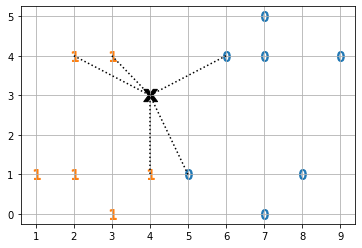

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.neighbors import NearestNeighbors

X0 = np.array(([5, 1], [6, 4], [7, 0], [7, 4], [7, 5], [8, 1], [9, 4]), dtype=float)
X1 = np.array(([1, 1], [2, 1], [2, 4], [3, 0], [3, 4], [4, 1]), dtype=float)
N0 = X0.shape[0]; N1 = X1.shape[0]
X = np.vstack((X0, X1))
y = np.vstack((np.zeros((N0, 1)), np.ones((N1, 1))))
x = np.array(([4, 3])) # <<< test
fig, ax = plt.subplots()
ax.grid(); ax.scatter(*x, c='k', marker=r'$\mathbf{x}$', s=200)
ax.scatter(*X0.T, marker=r'$0$', s=100)
ax.scatter(*X1.T, marker=r'$1$', s=100)
K = 5 # <<< número de vecinos
KNN = NearestNeighbors(n_neighbors=K).fit(X)
_, KNN_ind = KNN.kneighbors([x])
lines = np.zeros((K, 2, 2))
lines[:, 0, :] = np.squeeze(X[KNN_ind, :])
lines[:, 1, :] = np.repeat([x], K, axis=0)
ax.add_collection(LineCollection(lines, colors='black', linestyle='dotted'));

## Diagrama de Voronoi

El clasificador NN induce una partición del espacio de representación en una región $V(\boldsymbol{x}_n)$ por cada dato $\boldsymbol{x}_n$ tal que todos los puntos en $V(\boldsymbol{x}_n)$ están más cerca de $\boldsymbol{x}_n$ que de cualquier otro dato. En el plano, esta partición se conoce como **diagrama de Voronoi** y cada región de la partición se denomina **celda de Voronoi.**

**Ejemplo:**

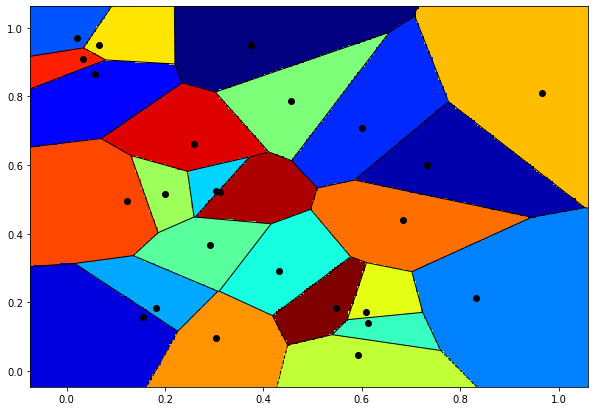

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree, Voronoi, voronoi_plot_2d

np.random.seed(42)
data = np.random.rand(25, 2)
vor = Voronoi(data)
fig, ax = plt.subplots(figsize=(10,7))
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
xlim = plt.xlim(); ylim = plt.ylim()
tree = KDTree(data)
x = np.linspace(xlim[0], xlim[1], 200)
y = np.linspace(ylim[0], ylim[1], 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]
plt.plot(data[:, 0], data[:, 1], 'ko')
plt.pcolormesh(x, y, tree.query(xy)[1].reshape(200, 200), cmap='jet');

## $K$ como hiperparámetro de regularización

Por lo general, el clasificador KNN obtiene sus mejores resultados con un valor de $K$ reducido. No obstante, $K$ puede interpretarse como un hiperparámetro de regularización con el que optimizar el grado de ajuste a los datos. Si $K$ es muy pequeño, el modelo tenderá a sobre-ajustarse a los datos mientras que, si $K$ es muy grande, se aproximará a las probabilidades a priori de las clases.

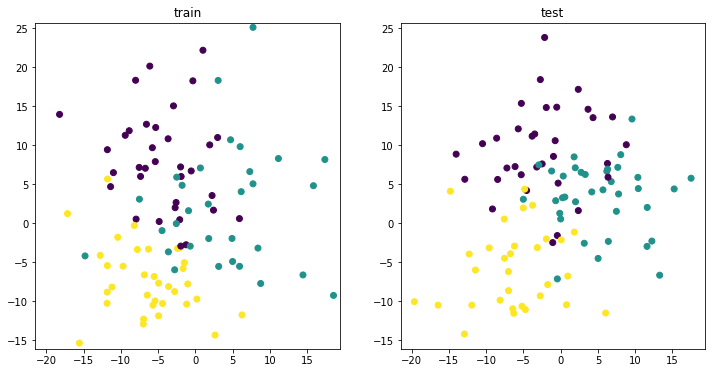

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100; x_train = X[:ntrain]; y_train = y[:ntrain];  x_test = X[ntrain:]; y_test = y[ntrain:]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax=axes[1]; ax.set_title('test'); ax.scatter(*x_test.T, c=y_test)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
ax=axes[0]; ax.set_title('train'); ax.scatter(*x_train.T, c=y_train)
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);

/tmp/ipykernel_107010/154169274.py:14: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')


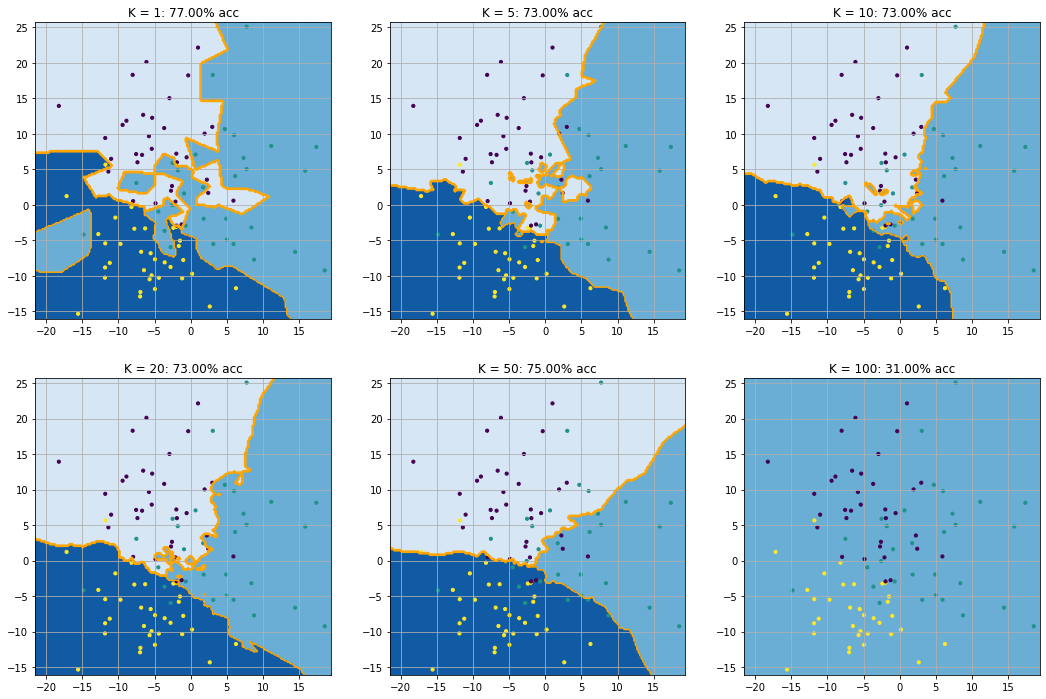

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

Ks = [1, 5, 10, 20, 50, 100]; nrows = 2; ncols = 3; n_Ks = len(Ks)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
for i, K in enumerate(Ks):
    ax = axes.flat[i]
    clf = KNN(n_neighbors=K).fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    ax.grid(); ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max);
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=200), np.linspace(y_min, y_max, num=200))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')
    ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues'); ax.scatter(*x_train.T, c=y_train, s=10)
    ax.set_title('K = {}: {:.2%} acc'.format(K, acc))

In [ ]:


x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 200)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

# use the knn model to predict
for k in [1, 2, 5]:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  plt.figure()
  y_predicted = knn.predict(xy)
  #plt.pcolormesh(y_predicted.reshape(200, 200), cmap='jet')
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)
  for i in range(len(y_unique)):
      plt.scatter(x_train[y_train == y_unique[i], 0],
                 x_train[y_train == y_unique[i], 1],
                 marker=markers[i],
                 c=colors[i])
  plt.title('k=%s' % (k))
  plt.savefig('knnClassify{}.eps'.format(k))
  plt.show()


In [ ]:

#plot train err and test err with different k
#ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.savefig('knnClassifyErrVsK.eps')
plt.show()


In [ ]:

#cross_validate
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], 'b-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 200')

#draw hot-map to show the probability of different class
knn = KNN(n_neighbors=10)
knn.fit(x_train, y_train)
xy_predic = knn.predict_proba(xy)
levels = np.arange(0, 1.01, 0.1)
for i in range(3):
    plt.figure()
    plt.contourf(xy_predic[:, i].ravel().reshape(200, 200), levels)
    plt.colorbar()
    plt.title('p(y=%s | data, k=10)' % (i))
    plt.savefig('knnClassifyDemo_hotmap_%s.eps' % (i))
plt.show()
